In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [3]:
!pip install 

     ------------------------------------ 423.3/423.3 MB 945.1 kB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Asus\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=50

In [3]:
import tensorflow as tf

# Limit TensorFlow to use only the available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)


In [ ]:
import zipfile

# name of the zip file to extract
zip_file_name = "example.zip"

# open the zip file for reading
with zipfile.ZipFile("/content/drive/MyDrive/apple_dataset.zip", 'r') as zip_ref:
    # extract all files to a specified directory
    zip_ref.extractall("/content/plant/")


In [4]:
path = "D:/Programs/python/Data_Science/Leaf detection/research implementation/soybean.leaf.dataset"
dataset = tf.keras.preprocessing.image_dataset_from_directory(path,
    seed=1,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 6807 files belonging to 9 classes.


In [5]:
class_names = dataset.class_names
class_names

['Caterpillar',
 'Diabrotica speciosa',
 'Healthy',
 'bacterial_blight',
 'brown_spot',
 'crestamento',
 'ferrugen',
 'powdery_mildew',
 'septoria']

In [103]:
for image_batch, labels_batch in dataset.take(1): #only for one batch
    print(image_batch.shape)
    print(labels_batch.numpy()) #representing single batch images in the form of array
    #each value represent a single image from the dataset

(32, 224, 224, 3)
[0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [8]:
labels_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 0, 0, 0, 2, 0, 3, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 2])>

### visualize some of the sample images from the datset

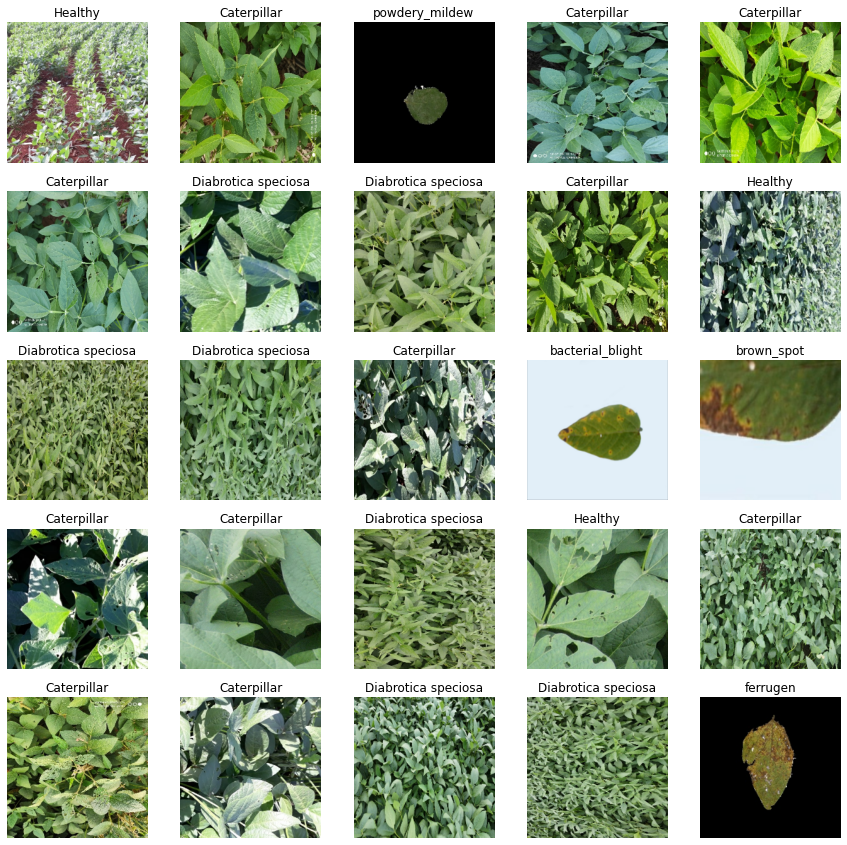

In [10]:
plt.figure(figsize=(15,15))
for image_batch, labels_batch in dataset.take(9):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
plt.show()

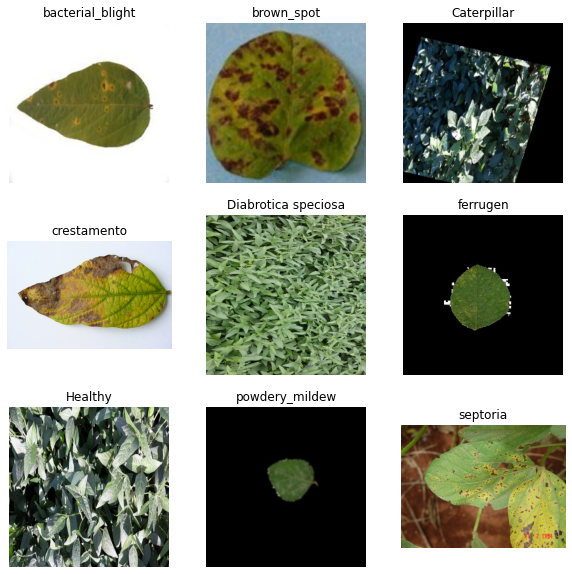

In [54]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# path to your image directory
img_dir = path

# get list of class names (assuming class names are the same as folder names)
class_names = os.listdir(img_dir)

# create a figure to plot images
fig = plt.figure(figsize=(10,10))

# loop through each class
for i, class_name in enumerate(class_names):
    # get list of image file names for the current class
    img_files = os.listdir(os.path.join(img_dir, class_name))
    # randomly choose an image from the current class
    img_file = random.choice(img_files)
    # read the image
    img = cv2.imread(os.path.join(img_dir, class_name, img_file))
    # convert the color space from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plot the image
    ax = fig.add_subplot(3, 3, i+1)
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')

# show the plot
plt.show()


In [26]:
#augmantation of the dataset
from keras.preprocessing.image import ImageDataGenerator

# Define the image data generator for preprocessing and augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,           # Rescale pixel values to [0, 1]
        shear_range=0.2,          # Apply random shear transformation
        zoom_range=0.2,           # Apply random zoom transformation
        horizontal_flip=True,     # Flip images horizontally
        validation_split=0.2      # Split the data into training and validation sets
)

# Load the training set using the image data generator
train_generator = train_datagen.flow_from_directory(
        path,
        target_size=(224, 224),   # Resize the images to (224, 224)
        batch_size=32,
        class_mode='categorical', # Use categorical crossentropy loss
        subset='training'         # Use the training subset
)

# Load the validation set using the image data generator
validation_generator = train_datagen.flow_from_directory(
        path,
        target_size=(224, 224),   # Resize the images to (224, 224)
        batch_size=32,
        class_mode='categorical', # Use categorical crossentropy loss
        subset='validation'       # Use the validation subset
)


Found 5366 images belonging to 9 classes.
Found 1338 images belonging to 9 classes.


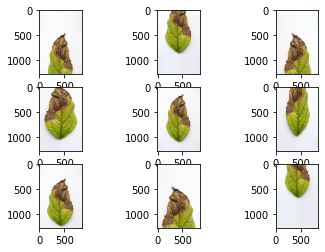

In [96]:
# example of  image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
image_path = 'D:/Programs/python/Data_Science/Leaf detection/research implementation/soybean.leaf.dataset/crestamento/3.JPG'
img = load_img(image_path)
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(
                   # Rescale pixel values to [0, 1]
        shear_range= 0.1,          # Apply random shear transformation
        zoom_range=0.2,           # Apply random zoom transformation
        horizontal_flip=True,
		height_shift_range=0.5,     # Flip images horizontally
        validation_split=0.2      # Split the data into training and validation sets
)

# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [6]:
len(dataset) #number of total btach file, in single batch there will be 32 image sample 

213

In [ ]:
train_size = 0.8
len(dataset)*train_size #80 percent of the data i will use for training

In [7]:
train_ds = dataset.take(524) #total 524 out of 655 batch set used as a training set 
len(train_ds)

213

In [ ]:
test_ds = dataset.skip(524) #and the rest will used as validation and testing set
#it will start counting after the given number
len(test_ds)

In [ ]:
val_size=0.1
len(dataset)*val_size  #10 percent will used as validation set from test dataset

In [ ]:
val_ds = test_ds.take(65)
len(val_ds)

In [ ]:
test_ds = test_ds.skip(65)
len(test_ds)

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [30]:
len(train_ds)


168

In [31]:
len(val_ds)


21

In [11]:
len(test_ds)


704

In [109]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
'''
overall this method are used to optimize the processing of each batch dataset
with the goal of reducing the overall processing time'''


'\noverall this method are used to optimize the processing of each batch dataset\nwith the goal of reducing the overall processing time'

In [12]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [110]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [111]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [112]:
train_ds = test_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:

#using transfer learning
from tensorflow.keras import models, layers, optimizers, callbacks
import tensorflow_hub as hub

# Define hyperparameters
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
n_classes = 9
epochs = 50
initial_learning_rate = 0.001
dropout_rate = 0.5
weight_decay = 0.0001
patience = 5
factor = 0.5

# Define preprocessing layers
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

# Load the pre-trained model
base_model = hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5",
                            trainable=False)

# Add new classification layers on top
model = models.Sequential([
    resize_and_rescale,
    base_model,
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.Dropout(dropout_rate),
    layers.Dense(n_classes, activation='softmax')
])

# Compile the model with learning rate scheduling
opt = optimizers.Adam(learning_rate=initial_learning_rate)
lr_schedule = callbacks.ReduceLROnPlateau(factor=factor, patience=patience)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(patience=patience, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(train_ds,
                    batch_size=BATCH_SIZE,
                    validation_data=val_ds,
                    epochs=epochs,
                    callbacks=[early_stopping, lr_schedule],
                    verbose=1)


In [137]:
import pickle

with open('soyabean_history_model.pkl', 'rb') as file:
    history = pickle.load(file)
    
    acc = history['accuracy']
    print(acc[-1])
    val_acc = history['val_accuracy']
    print(val_acc[-1])
    loss = history['loss']
    print(loss[-1])
    val_loss = history['val_loss']
    print(val_loss[-1])



0.9054104685783386
0.8735119104385376
0.26077574491500854
0.3137390613555908


In [139]:

# Loading the history
with open('soyabean_history_model.pkl', 'rb') as file:
    history_dict = pickle.load(file)
    history = tf.keras.callbacks.History()
    history.history = history_dict


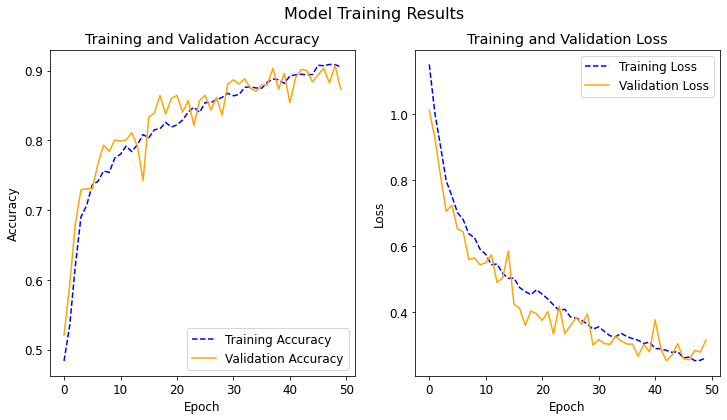

In [161]:
import matplotlib.pyplot as plt

# Define the figure size and font size
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 12})

# Plot the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy', color='blue', linestyle='--')
plt.plot(range(50), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss', color='blue', linestyle='--')
plt.plot(range(50), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Add a title to the figure
plt.suptitle('Model Training Results', fontsize=16)

# Show the plot
plt.show()


In [ ]:
#testing on a test set

import numpy as np
import tensorflow as tf
import random

np.random.seed(12)
random.seed(12)
tf.random.set_seed(12)

# Load the trained model
model = load_model('D:/Programs/python/Data_Science/Leaf detection/research implementation/Soyabean_Model.h5')

# Evaluate the model
score = model.evaluate_generator(test_ds, steps=len(test_ds))
print("Test accuracy: {:.2f}%".format(score[1]*100))
print("Test loss: {:.4f}".format(score[0]))



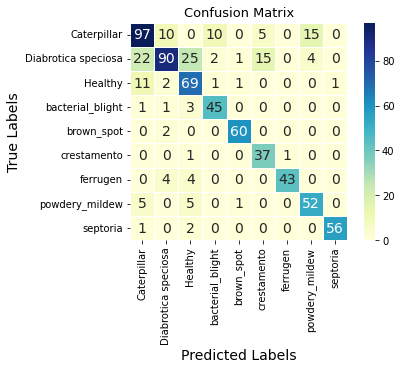

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the confusion matrix
confusion_matrix =  [[97, 10, 0, 10, 0, 5, 0, 15, 0],
                    [22, 90, 25, 2, 1, 15, 0, 4, 0],
                    [11, 2, 69, 1, 1, 0, 0, 0, 1],
                    [1, 1, 3, 45, 0, 0, 0, 0, 0],
                    [0, 2, 0, 0, 60, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0, 37, 1, 0, 0],
                    [0, 4, 4, 0, 0, 0, 43, 0, 0],
                    [5, 0, 5, 0, 1, 0, 0, 52, 0],
                    [1, 0, 2, 0, 0, 0, 0, 0, 56]]
# Define the class names
class_names = ['Caterpillar', 'Diabrotica speciosa', 'Healthy', 'bacterial_blight',
               'brown_spot', 'crestamento', 'ferrugen', 'powdery_mildew', 'septoria']

# Create a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", cbar=True, square=True, linewidths=1, linecolor='white', fmt='g', annot_kws={"fontsize":14})

# Add labels
plt.title("Confusion Matrix", fontsize=13)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)

# Add class names on x and y axis
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names, rotation=90, fontsize=10)
plt.yticks(tick_marks + 0.5, class_names, rotation=0, fontsize=10)

# Show the plot
plt.show()


In [15]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Define the confusion matrix
confusion_matrix = [[97, 10, 0, 10, 0, 5, 0, 15, 0],
                    [22, 90, 25, 2, 1, 15, 0, 4, 0],
                    [11, 2, 69, 1, 1, 0, 0, 0, 1],
                    [1, 1, 3, 45, 0, 0, 0, 0, 0],
                    [0, 2, 0, 0, 60, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0, 37, 1, 0, 0],
                    [0, 4, 4, 0, 0, 0, 43, 0, 0],
                    [5, 0, 5, 0, 1, 0, 0, 52, 0],
                    [1, 0, 2, 0, 0, 0, 0, 0, 56]]

# Convert the confusion matrix to a numpy array
confusion_matrix = np.array(confusion_matrix)

# Calculate the number of samples
num_samples = np.sum(confusion_matrix)
print(num_samples)
# Calculate the number of classes
num_classes = len(confusion_matrix)

# Calculate the number of true positives (TP), false positives (FP),
# false negatives (FN), and true negatives (TN) for each class
TP = np.diag(confusion_matrix)
FP = np.sum(confusion_matrix, axis=0) - TP
FN = np.sum(confusion_matrix, axis=1) - TP
TN = num_samples - TP - FP - FN

# Calculate the precision, recall, and F1 score for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * precision * recall / (precision + recall)

# Calculate the support for each class
support = np.sum(confusion_matrix, axis=1)

# Calculate the overall accuracy
overall_accuracy = np.sum(TP) / num_samples

# Print the evaluation metrics
for i in range(num_classes):
    print(f"Class {i}:")
    print(f"  Precision: {precision[i]:.3f}")
    print(f"  Recall: {recall[i]:.3f}")
    print(f"  F1-score: {f1_score[i]:.3f}")
    print(f"  Support: {support[i]}")
print(f"Overall accuracy: {overall_accuracy:.3f}")


705
Class 0:
  Precision: 0.708
  Recall: 0.708
  F1-score: 0.708
  Support: 137
Class 1:
  Precision: 0.826
  Recall: 0.566
  F1-score: 0.672
  Support: 159
Class 2:
  Precision: 0.633
  Recall: 0.812
  F1-score: 0.711
  Support: 85
Class 3:
  Precision: 0.776
  Recall: 0.900
  F1-score: 0.833
  Support: 50
Class 4:
  Precision: 0.952
  Recall: 0.968
  F1-score: 0.960
  Support: 62
Class 5:
  Precision: 0.649
  Recall: 0.949
  F1-score: 0.771
  Support: 39
Class 6:
  Precision: 0.977
  Recall: 0.843
  F1-score: 0.905
  Support: 51
Class 7:
  Precision: 0.732
  Recall: 0.825
  F1-score: 0.776
  Support: 63
Class 8:
  Precision: 0.982
  Recall: 0.949
  F1-score: 0.966
  Support: 59
Overall accuracy: 0.779
